In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import scipy.io as sio

In [13]:
#This cell forms the mat file you were already given

"""
#load data

#data source: https://finance.yahoo.com/quote/%5EGSPC/history/

weeks_after_start = []
dewtemp = []

f = open('localweather.csv')
header = f.readline()
idx = header.split(',').index('HourlyDewPointTemperatureC')
startdate = None
line = f.readline()

while len(line) > 0:
    splitline = line.split(',')
    
    #load day
    dt = splitline[5].split(' ')
    d = dt[0].split('-')
    t = dt[1].split(':')
    
    d = int(d[0]),int(d[1]),int(d[2])    
    t = int(t[0]), int(t[1])
    d = datetime.datetime(year=d[0],month=d[1],day=d[2], hour=t[0],minute=d[1])
    if startdate is None:
        startdate = copy.deepcopy(d)
    
    if  len(splitline[idx].strip('')) == 0: 
        line = f.readline()
        continue
    weeks_after_start.append((d - startdate).seconds/( 24 * 60 * 60*7 +0.) + (d-startdate).days/7.)
    
    dewtemp.append(float(splitline[idx]))

    line = f.readline()

weeks_after_start, dewtemp = np.array(weeks_after_start), np.array(dewtemp)
plt.plot(weeks_after_start, dewtemp)

plt.xlabel('Weeks after first reading')
plt.ylabel('Dew point temp (C)')
plt.tight_layout()
plt.savefig('polyfit_hw1_0.png')
plt.savefig('polyfit_hw1_0.eps')
N = len(weeks_after_start)

sio.savemat('weatherDewTmp.mat',{'weeks':weeks_after_start,'dew':dewtemp})
print N
"""

data = sio.loadmat('weatherDewTmp.mat')
weeks_after_start = data['weeks'][0]
dewtemp = data['dew'][0]
N = len(dewtemp)


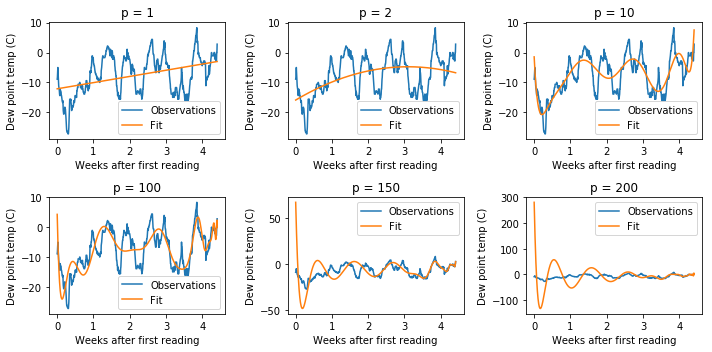

In [18]:

def buildXy(weeks_after_start, dewtemp, poly_order):
    z = weeks_after_start
    X = np.zeros((N,poly_order+1))
    for k in range(poly_order+1):
        X[:,k] = np.power(z,k)
    y = dewtemp + 0.
    return X,y

def solveLinearSystem(X,y,lam):
    theta = np.linalg.solve(np.dot(X.T,X) + lam*np.eye(poly_order+1), np.dot(X.T,y))
    return theta
    
#create model
plt.figure(figsize = (10,5))
counter = 0
for poly_order in [1,2,10,100,150,200]:
    

    X,y = buildXy(weeks_after_start, dewtemp, poly_order)
    
    #unregularized 
    theta = solveLinearSystem(X,y,0.)
    ypred = np.dot(X,theta)

    counter += 1
    plt.subplot(2,3,counter)
    
    plt.plot(z, y)
    plt.plot(z, ypred) 
    plt.title('p = %d' % poly_order)
    
    plt.xlabel('Weeks after first reading')
    plt.ylabel('Dew point temp (C)')
    plt.legend(['Observations','Fit'])
plt.tight_layout()
plt.savefig('polyfit_hw1_unreg.png')
plt.savefig('polyfit_hw1_unreg.eps')


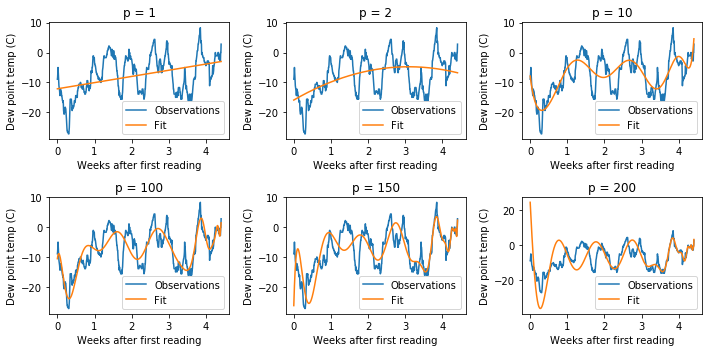

In [20]:

#create model
plt.figure(figsize = (10,5))
counter = 0
for poly_order in [1,2,10,100,150,200]:
    X,y = buildXy(weeks_after_start, dewtemp, poly_order)
    
    #regularized 
    theta = solveLinearSystem(X,y,0.0001)
    ypred = np.dot(X,theta)

    counter += 1
    plt.subplot(2,3,counter)
    
    plt.plot(z, y)
    plt.plot(z, ypred) 
    plt.title('p = %d' % poly_order)
    
    plt.xlabel('Weeks after first reading')
    plt.ylabel('Dew point temp (C)')
    plt.legend(['Observations','Fit'])
plt.tight_layout()
plt.savefig('polyfit_hw1_reg.png')
plt.savefig('polyfit_hw1_reg.eps')
    

In [16]:

#calculate condition numbers
for poly_order in [1,2,5,10]:
    z = weeks_after_start
    X = np.zeros((N,poly_order+1))
    for k in range(poly_order+1):
        X[:,k] = np.power(z,k)
    y = dewtemp + 0.

    A = np.dot(X.T,X) 
    A = (A + A.T)/2.
    for alpha in [0.,.1,1.,10., 100.]:
        d = np.real(np.linalg.eig(A+alpha * X.shape[0]*np.eye(A.shape[0]))[0])
        print '%d, %.1f, %.2e' % (poly_order, alpha, np.max(d) / np.min(d) )
                                  



1, 0.0, 3.25e+01
1, 0.1, 2.28e+01
1, 1.0, 6.75e+00
1, 10.0, 1.69e+00
1, 100.0, 1.07e+00
2, 0.0, 1.48e+03
2, 0.1, 5.30e+02
2, 1.0, 7.91e+01
2, 10.0, 9.20e+00
2, 100.0, 1.82e+00
5, 0.0, 7.31e+08
5, 0.1, 2.71e+06
5, 1.0, 2.72e+05
5, 10.0, 2.72e+04
5, 100.0, 2.72e+03
10, 0.0, 7.16e+18
10, 0.1, 3.97e+12
10, 1.0, 3.97e+11
10, 10.0, 3.97e+10
10, 100.0, 3.97e+09


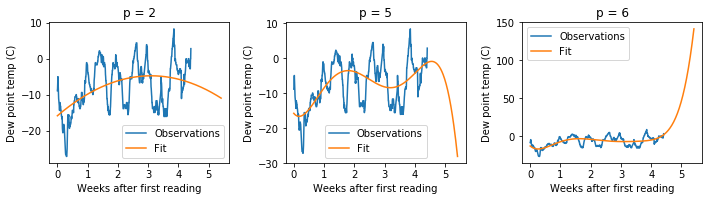

In [17]:
def packX(z,poly_order):
    
    X = np.zeros((len(z),poly_order+1))
    for k in range(poly_order+1):
        X[:,k] = np.power(z,k)
    return X
#create model
plt.figure(figsize = (10,5))
counter = 0
for poly_order in [2,5,6]:
    z = weeks_after_start
    zf = np.hstack([z, np.linspace(z[-1],z[-1]+1.,100)])

    X = packX(z,poly_order)
    Xf = packX(zf,poly_order)
    y = dewtemp + 0.
    #fit model

    theta = np.linalg.solve(np.dot(X.T,X) + .01*np.eye(poly_order+1), np.dot(X.T,y))
    ypred = np.dot(Xf,theta)

    counter += 1
    plt.subplot(2,3,counter)

    plt.plot(z, y)
    plt.plot(zf, ypred) 
    plt.title('p = %d' % poly_order)

    plt.xlabel('Weeks after first reading')
    plt.ylabel('Dew point temp (C)')
    plt.legend(['Observations','Fit'])
plt.tight_layout()
plt.savefig('polyfit_hw1_forecast.png')
plt.savefig('polyfit_hw1_forecast.eps')
